<h1><center>cs1001.py , Tel Aviv University, Spring 2020</center></h1>
<img src="http://www.pngall.com/wp-content/uploads/2016/05/Python-Logo-PNG-Image-180x180.png" width=50/>

# Recitation 10

We discussed Binary search trees and Hash Tables 

#### Takeaways:
- Important properties of Binary Search Trees:
    - Insert and find take $O(h)$ time where $h$ is the height of the tree.
    - When a tree containing $n$ nodes is balanced, $h = O(\log{n})$.
    - Many methods in this class are implemented using recursion.
- Important properties of Hash Tables:
    - Hash tables can be useful for many algorithms, including memoization. 
    - Insert and find operation run in $O(1)$ on average, but $O(n)$ in the worst case (where $n$ is the number of elements in the table)
    - Make sure you understand the complexity analysis for hash tables (see the links below).

#### Code for printing several outputs in one cell (not part of the recitation):

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

##  Binary Search Trees

Recall the (recursive) definition of a binary tree:
* A binary tree is an empty tree (a tree which contains no nodes), or
* Is composed of a root node, a Binary Tree called the left subtree of the root and a Binary Tree called the right subtree of the root

A binary search tree is a binary tree whose nodes have values, with the additional property that if $v$ is a node then all nodes in the left subtree of $v$ have keys smaller than $v.key$ and all those in the right subtree of $v$ have keys larger than $v.key$.

Binary search trees support operations such as insertion, deletion, search and many more.

In [3]:
## This file contains functions for the representation of binary trees.
## used in class Binary_search_tree's __repr__
## Written by a former student in the course - thanks to Amitai Cohen
## No need to fully understand this code

def printree(t, bykey = True):
        """Print a textual representation of t
        bykey=True: show keys instead of values"""
        #for row in trepr(t, bykey):
        #        print(row)
        return trepr(t, bykey)

def trepr(t, bykey = False):
        """Return a list of textual representations of the levels in t
        bykey=True: show keys instead of values"""
        if t==None:
                return ["#"]

        thistr = str(t.key) if bykey else str(t.val)

        return conc(trepr(t.left,bykey), thistr, trepr(t.right,bykey))

def conc(left,root,right):
        """Return a concatenation of textual represantations of
        a root node, its left node, and its right node
        root is a string, and left and right are lists of strings"""
        
        lwid = len(left[-1])
        rwid = len(right[-1])
        rootwid = len(root)
        
        result = [(lwid+1)*" " + root + (rwid+1)*" "]
        
        ls = leftspace(left[0])
        rs = rightspace(right[0])
        result.append(ls*" " + (lwid-ls)*"_" + "/" + rootwid*" " + "|" + rs*"_" + (rwid-rs)*" ")
        
        for i in range(max(len(left),len(right))):
                row = ""
                if i<len(left):
                        row += left[i]
                else:
                        row += lwid*" "

                row += (rootwid+2)*" "
                
                if i<len(right):
                        row += right[i]
                else:
                        row += rwid*" "
                        
                result.append(row)
                
        return result

def leftspace(row):
        """helper for conc"""
        #row is the first row of a left node
        #returns the index of where the second whitespace starts
        i = len(row)-1
        while row[i]==" ":
                i-=1
        return i+1

def rightspace(row):
        """helper for conc"""
        #row is the first row of a right node
        #returns the index of where the first whitespace ends
        i = 0
        while row[i]==" ":
                i+=1
        return i





In [4]:
class Tree_node():
    def __init__(self, key, val):
        self.key = key
        self.val = val
        self.left = None
        self.right = None

    def __repr__(self):
        return "(" + str(self.key) + ":" + str(self.val) + ")"
    
    
    
class Binary_search_tree():

    def __init__(self):
        self.root = None


    def __repr__(self): #no need to understand the implementation of this one
        out = ""
        for row in printree(self.root): #need printree.py file
            out = out + row + "\n"
        return out


    def lookup(self, key):
        ''' return node with key, uses recursion '''

        def lookup_rec(node, key):
            if node == None:
                return None
            elif key == node.key:
                return node
            elif key < node.key:
                return lookup_rec(node.left, key)
            else:
                return lookup_rec(node.right, key)

        return lookup_rec(self.root, key)



    def insert(self, key, val):
        ''' insert node with key,val into tree, uses recursion '''

        def insert_rec(node, key, val):
            if key == node.key:
                node.val = val     # update the val for this key
            elif key < node.key:
                if node.left == None:
                    node.left = Tree_node(key, val)
                else:
                    insert_rec(node.left, key, val)
            else: #key > node.key:
                if node.right == None:
                    node.right = Tree_node(key, val)
                else:
                    insert_rec(node.right, key, val)
            return
        
        if self.root == None: #empty tree
            self.root = Tree_node(key, val)
        else:
            insert_rec(self.root, key, val)


    def minimum(self):
        ''' return node with minimal key '''
        if self.root == None:
            return None
        node = self.root
        left = node.left
        while left != None:
            node = left
            left = node.left
        return node


    def depth(self):
        ''' return depth of tree, uses recursion'''
        def depth_rec(node):
            if node == None:
                return -1
            else:
                return 1 + max(depth_rec(node.left), depth_rec(node.right))

        return depth_rec(self.root)


    def size(self):
        ''' return number of nodes in tree, uses recursion '''
        def size_rec(node):
            if node == None:
                return 0
            else:
                return 1 + size_rec(node.left) + size_rec(node.right)

        return size_rec(self.root)
    
    def inorder(self):
        '''prints the keys of the tree in a sorted order'''
        def inorder_rec(node):
            if node == None:
                return
            inorder_rec(node.left)
            print(node.key)
            inorder_rec(node.right)
            
        inorder_rec(self.root)


t = Binary_search_tree()
t.insert(4,'a')
t.insert(2,'a')
t.insert(6,'a')
t.insert(1,'a')
t.insert(3,'a')
t.insert(5,'a')
t.insert(7,'a')
t
t.inorder()

              4              
       ______/ |______       
      2               6      
   __/ |__         __/ |__   
  1       3       5       7  
 / |     / |     / |     / | 
#   #   #   #   #   #   #   #

1
2
3
4
5
6
7


<b>Claim:</b> An inorder traversal of a binary search tree prints the keys in ascending order.

<b>Proof, by complete induction on the size of tree:</b>
* Base - for $n = 1$ the claim is trivial
* Assume the claim holds for all $i \leq n$
* For a tree of size $n+1$ with root $v$ consider the following:
    * Both the right and the left subtree of $v$ have size at most $n$
    * By induction, all keys in $v.left$ are printed in ascending order (and they are all smaller than $v.key$)
    * Next, $v.key$ is printed
    * Finally, by induction, all keys in $v.right$ are printed in ascending order (and they are all larger than $v.key$)
    * Thus, the keys of the tree (which has size $n+1$) are printed in ascending order


More information on complete induction: https://en.wikipedia.org/wiki/Mathematical_induction#Complete_(strong)_induction

### Please make sure you go over the following question at home:


<b>Question:</b> Assume $N = 2^n - 1$ for some $n$, find a method of inserting the numbers $[1,...,N]$ to a BST such that it is completely balanced (i.e. - it is a complete tree).
Specifically, you are requested to add a method to the Binary_search_tree class to support the following:

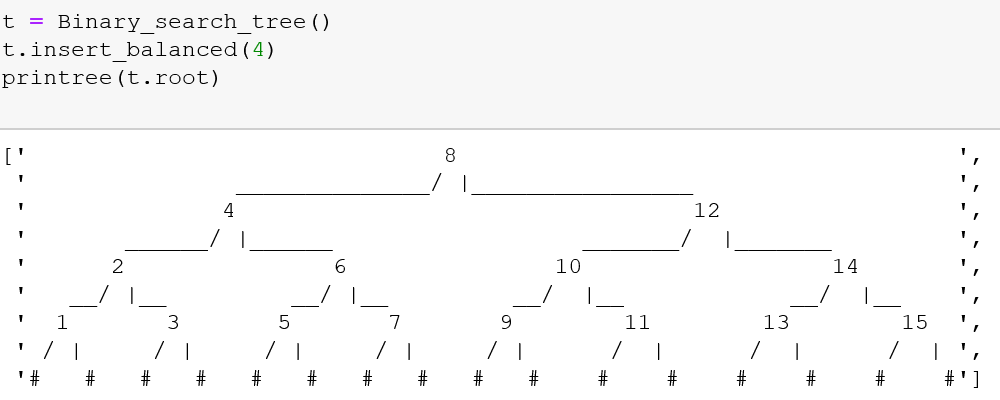






<b>Solution:</b> As we usually do with trees, we give a recursive solution. Our input will be a node and a first and last index to enter into the tree rooted in the node. We start with the root, $first = 1, last = 2^n - 1$

- Base case: If $first = last$ then we simply need to create a root with no sons labeled $first$ 
- Otherwise, we find the mid point $mid = (first + last - 1 ) // 2$. We recursively insert $first,...,mid$ into the left son of the node, $mid + 1$ into the current node and $mid + 2, ..., last$ into the right son of the node.

In [5]:
class Tree_node():
    def __init__(self, key, val):
        self.key = key
        self.val = val
        self.left = None
        self.right = None

    def __repr__(self):
        return "(" + str(self.key) + ":" + str(self.val) + ")"
    
    
    
class Binary_search_tree():

    def __init__(self):
        self.root = None


    def __repr__(self): #no need to understand the implementation of this one
        out = ""
        for row in printree(self.root): #need printree.py file
            out = out + row + "\n"
        return out


    def lookup(self, key):
        ''' return node with key, uses recursion '''

        def lookup_rec(node, key):
            if node == None:
                return None
            elif key == node.key:
                return node
            elif key < node.key:
                return lookup_rec(node.left, key)
            else:
                return lookup_rec(node.right, key)

        return lookup_rec(self.root, key)



    def insert(self, key, val):
        ''' insert node with key,val into tree, uses recursion '''

        def insert_rec(node, key, val):
            if key == node.key:
                node.val = val     # update the val for this key
            elif key < node.key:
                if node.left == None:
                    node.left = Tree_node(key, val)
                else:
                    insert_rec(node.left, key, val)
            else: #key > node.key:
                if node.right == None:
                    node.right = Tree_node(key, val)
                else:
                    insert_rec(node.right, key, val)
            return
        
        if self.root == None: #empty tree
            self.root = Tree_node(key, val)
        else:
            insert_rec(self.root, key, val)


    def minimum(self):
        ''' return node with minimal key '''
        if self.root == None:
            return None
        node = self.root
        left = node.left
        while left != None:
            node = left
            left = node.left
        return node


    def depth(self):
        ''' return depth of tree, uses recursion'''
        def depth_rec(node):
            if node == None:
                return -1
            else:
                return 1 + max(depth_rec(node.left), depth_rec(node.right))

        return depth_rec(self.root)


    def size(self):
        ''' return number of nodes in tree, uses recursion '''
        def size_rec(node):
            if node == None:
                return 0
            else:
                return 1 + size_rec(node.left) + size_rec(node.right)

        return size_rec(self.root)
    
    def inorder(self):
        '''prints the keys of the tree in a sorted order'''
        def inorder_rec(node):
            if node == None:
                return
            inorder_rec(node.left)
            print(node.key)
            inorder_rec(node.right)
            
        inorder_rec(self.root)
    
    def insert_balanced(self, n):
        def insert_balanced_rec(first, last):
            if first == last:
                return Tree_node(first, first)
            mid = (first + last) // 2
            root = Tree_node(mid, mid)
            root.left = insert_balanced_rec(first, mid - 1)
            root.right = insert_balanced_rec(mid + 1, last)
            return root
        self.root = insert_balanced_rec(1, 2**n - 1)            
            




t = Binary_search_tree()
t.insert_balanced(4)
printree(t.root)


['                              8                                    ',
 '               ______________/ |________________                   ',
 '              4                                 12                 ',
 '       ______/ |______                  _______/  |_______         ',
 '      2               6               10                  14       ',
 '   __/ |__         __/ |__         __/  |__            __/  |__    ',
 '  1       3       5       7       9        11        13        15  ',
 ' / |     / |     / |     / |     / |      /  |      /  |      /  | ',
 '#   #   #   #   #   #   #   #   #   #    #    #    #    #    #    #']

## Hash Tables

We wish to have a data structure that implements the operations: insert, search and delete in **expected** $O(1)$ time. 

Summarizing the insert and search complexity of the data structures that we have seen already:

| implementation                | insert                   | search   | delete              |
|-------------------------------|--------------------------|----------|---------------------|
| Python list                   | O(1) always at the end   | O(n)     | O(n)                |
| Python ordered list           | O(n)                     | O(log n) | O(n)                |
| Linked list                   | O(1) always at the start | O(n)     | O(1) given the node before the one to delete |
| Sorted linked list            | O(n)                     | O(n)     | O(1) given the node before the one to delete |
| Unbalanced Binary Search Tree | O(n)                     | O(n)     | O(n)                |
| Balanced Binary Search Tree   | O(log n)                 | O(log n) | O(log n)            |

Please read <a href="https://github.com/taucsrec/recitations/blob/master/2018b/Michal/rec9/DataStructures_summary.pdf"> the following summary</a> on the various data structures mentioned in class.

A detailed summary on the complexity of insert/search operations using hash tables can be found <a href="http://tau-cs1001-py.wdfiles.com/local--files/recitation-logs-2017a/hashtable_find_and_insert_complexity.pdf">here</a>. Make sure you read it.

### Exercise: 
Given a string $st$ of length $n$ and a small integer $\ell$, write a function that checks whether there is a substring in $st$ of length $\ell$ that appears more than once.

#### Solution \#1: Naive
The complexity is $O(\ell(n-\ell)^2)$. 
There $O((n-\ell)^2)$ iterations (make sure you undersand why) and in each iteration we perform operations in $O(\ell)$ time.

In [4]:
def repeat_naive(st, l): 
    for i in range(len(st)-l+1):
        for j in range(i+1,len(st)-l+1):
            if st[i:i+l]==st[j:j+l]:
                return True
    return False

repeat_naive("hello", 1)
repeat_naive("hello"*10, 45)
repeat_naive("hello"*10, 46)

True

True

False

Let's test our algorithm with by generating a random string of a given size.

In [7]:
import random
def gen_str(size, alphabet = "abcdefghijklmnopqrstuvwxyz"):
    ''' Generate a random string of length size over alphabet '''
    s=""
    for i in range(size):
        s += random.choice(alphabet)
    return s
rndstr = gen_str(1000)
print(rndstr)
repeat_naive(rndstr, 3)
repeat_naive(rndstr, 10)



dlotznwapuossuxedpcsvzoufxhqvfonloryhpgsyrzyolkfmfxpwnmeizpdykeckfmgaeaadsgnyzqsxcfhpwouweerlqdsguvygjueogzluetlacuhaimdosiqewcwdmkisskuaqpyoebiinexfxffikzodqwkdofiqcbxhxcvflpylluotyjqndguigmgainmytznmirbeynyebitpcmaaaghaovddmmlcymdgqgjsaxkxrxvqpsvwuoxzddvwbixwdxnxxlmqfwmbozipvfpudijxttjgvkyziljouovunoylhuzlbmcgiiiqnftfxuzuktqsewcucoilfoigtixrlynmlnoxignmulzcajelhzwupblwwtbzgjbpyrsidazfpknzgvqqaajgnbwcbzmeefzkwaytkespouzqrureuwxppxdpyahgqziqsrherqiilcpwrdmtoaeefpabbvvzewfcvnrjifahqbjatyswtylywrdqvuemvhmdrbtvokopegwaljkpeafnysdbcswmavrpjkixrdxoenaebztyiiplhdxizpbyecjfcyirksttntxiihbtyzmsepctluedamzaqcnyvhazbycuygqxstxnhsvjbbgoupkqoocpuepnmnzkecqklxcbmmzlndjbafiqgihqfjzgnkmpzuhishmhytzpyqrtnppnwfnxisinqngbumlrtozmmnuzkbbjacforiuqbgewvtrctdpydsylivhorxjzkuvafvggysstzgjgprfhieebrlhvhurnfeybshvpiuvtpvtyykpkthraeeydqxvlladhcnsofrlaljylkxfqzrdeptbrgumynhdspzfabvgmzscnfmydswhxnmehzyziumeutuxxnshvovyfwovscdrfcqelivceiwujagevnaviolrlypxsplxtmdlkakvhntmwhvxzteabgzfyctntapasbatvqogxripapfdzlgphrno

True

False

For bigger $n$ and $\ell$, this could be quite slow:

In [8]:
rndstr = gen_str(10000)
repeat_naive(rndstr, 3)
repeat_naive(rndstr, 10)

True

False

### The class Hashtable from the lectures

In [9]:
class Hashtable:
    def __init__(self, m, hash_func=hash):
        """ initial hash table, m empty entries """
        ##bogus initialization #1:
        #self.table = [[]*m]
        ##bogus initialization #2:
        #empty=[]
        #self.table = [empty for i in range(m)]
        
        self.table = [ [] for i in range(m)]
        self.hash_mod = lambda x: hash_func(x) % m # using python hash function

    def __repr__(self):
        L = [self.table[i] for i in range(len(self.table))]
        return "".join([str(i) + " " + str(L[i]) + "\n" for i in range(len(self.table))])
    
    def find(self, item):
        """ returns True if item in hashtable, False otherwise  """
        i = self.hash_mod(item)
        return item in self.table[i]
        #if item in self.table[i]:
        #    return True
        #else:
        #    return False

    def insert(self, item):
        """ insert an item into table """
        i = self.hash_mod(item)
        if item not in self.table[i]:
            self.table[i].append(item)


#### Solution \#2: using the class Hashtable

In [10]:
def repeat_hash1(st, l):
    m=len(st)-l+1
    htable = Hashtable(m)
    for i in range(len(st)-l+1):
        if htable.find(st[i:i+l])==False:
            htable.insert(st[i:i+l])
        else:
            return True
    return False

The expected (average) complexity is: $O(\ell(n-\ell))$

Creating the table takes $O(n-\ell)$ time, and there are $O(n-\ell)$ iterations, each taking expected $O(\ell)$ time.



The worst case complexity is: $O(\ell(n-\ell)^2)$

Creating the table takes $O(n-\ell)$ time, and the time for executing the loop is
$\ell\cdot\sum_{i=0}^{n-\ell}{i}= O(\ell(n-\ell)^2)$

Which native Python data structure is most suitable for this problem?

#### Solution #3: using Python's set implementation


In [11]:
def repeat_hash2(st, l):
    htable = set() #Python sets use hash functions for fast lookup
    for i in range(len(st)-l+1):
        if st[i:i+l] not in htable:
            htable.add(st[i:i+l])
        else: return True
    return False

#### Competition between the 3 solutions

In [12]:
import time
str_len=1000
st=gen_str(str_len)
l=10
for f in [repeat_naive,repeat_hash1,repeat_hash2]:
    t0=time.perf_counter()
    res=f(st, l)
    t1=time.perf_counter()
    print(f.__name__, t1-t0, "found?",res)

repeat_naive 0.42494059999989986 found? False
repeat_hash1 0.0042048000000249885 found? False
repeat_hash2 0.001372700000047189 found? False


In [13]:
str_len=2000
st=gen_str(str_len)
l=10
for f in [repeat_naive,repeat_hash1,repeat_hash2]:
    t0=time.perf_counter()
    res=f(st, l)
    t1=time.perf_counter()
    print(f.__name__, t1-t0, "found?",res)

repeat_naive 1.633473399999957 found? False
repeat_hash1 0.009137300000020332 found? False
repeat_hash2 0.0028928000001542387 found? False


For a random string of size $n=1000$ and for $l=10$ the running time of repeat_hash2 is the smallest, while the one for repeat_naive is the largest.

When increasing $n$ to 2000, the running time of repeat_naive increases by ~4, while the running time of repeat_hash1, repeat_hash2 increases by ~2.

#### Time spent on creating the table
When $st$ is "a"$*1000$, repeat_hash1 is the slowest, since it spends time on creating an empty table of size 991.

In [14]:
st="a"*1000
l=10
for f in [repeat_naive,repeat_hash1,repeat_hash2]:
    t0=time.perf_counter()
    res=f(st, l)
    t1=time.perf_counter()
    print(f.__name__, t1-t0, "found?",res)

repeat_naive 6.799999937356915e-06 found? True
repeat_hash1 0.00018980000004376052 found? True
repeat_hash2 5.799999826194835e-06 found? True


### The effect of table size

The second solution, with control over the table size

In [15]:
def repeat_hash1_var_size(st, l, m=0):
    if m==0: #default hash table size is ~number of substrings to be inserted
        m=len(st)-l+1
    htable = Hashtable(m)
    for i in range(len(st)-l+1):
        if htable.find(st[i:i+l])==False:
            htable.insert(st[i:i+l])
        else:
            return True
    return False

#### Comparing tables sizes

In [16]:
import time
str_len=1000
st=gen_str(str_len)
l=10
print("str_len=",str_len, "repeating substring len=",l)
for m in [1, 10, 100, 1000, 1500, 10000, 100000]:
    t0=time.perf_counter()
    res=repeat_hash1_var_size(st, l, m)
    t1=time.perf_counter()
    print(t1-t0, "found?",res, "table size=",m)

str_len= 1000 repeating substring len= 10
0.044579099999964455 found? False table size= 1
0.00932720000014342 found? False table size= 10
0.004570000000057917 found? False table size= 100
0.0057033999999021034 found? False table size= 1000
0.004408700000112731 found? False table size= 1500
0.006572400000095513 found? False table size= 10000
0.04230780000011691 found? False table size= 100000


### Summary
Make sure you read the following <a href="http://tau-cs1001-py.wdfiles.com/local--files/recitation-logs-2016b/m_10_repeating_substring_additional_material.pdf">summary</a> that includes a detailed explanation on the experiments.